# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import os
import csv

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [3]:
#api.openweathermap.org/data/2.5/weather?id={city id}&appid={your api key}
city_in_frame = []
lat = []
lon = []
temp_max = []
humidity = []
clouds = []
speed = []
country =[]
date = []
base = f"http://api.openweathermap.org/data/2.5/weather?"

for city in cities:
    # Tries to save the info into list if find error moves to next city
    try:
        arg = {'q' : city, 'appid' : weather_api_key, 'units':'imperial'}
        response = requests.get(base, arg).json()
        city_in_frame.append(response['name'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    except KeyError:
        print(f'{city}, some result was not found!')



frame = pd.DataFrame({
    "City" :city_in_frame, "Latitude":lat, "Longitude":lon, "Max Temperature":temp_max, "Humidity":humidity,\
    "Cloudiness":clouds, "Wind Speed":speed, "Country":country, "Date":date\
})



belushya guba, some result was not found!
temaraia, some result was not found!
amderma, some result was not found!
lolua, some result was not found!
pousat, some result was not found!
saleaula, some result was not found!
vaitupu, some result was not found!
marcona, some result was not found!
barentsburg, some result was not found!
ngukurr, some result was not found!
mahadday weyne, some result was not found!
taolanaro, some result was not found!
nizhneyansk, some result was not found!
grand river south east, some result was not found!
sentyabrskiy, some result was not found!
ruatoria, some result was not found!
port-de-paix, some result was not found!
mys shmidta, some result was not found!
illoqqortoormiut, some result was not found!
tunduru, some result was not found!
rungata, some result was not found!
attawapiskat, some result was not found!
samusu, some result was not found!
nguiu, some result was not found!
burica, some result was not found!
tabiauea, some result was not found!
s

In [4]:
frame.head(10)

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kungurtug,50.60,97.52,33.40,45,0,0.76,RU,1587345484
1,Namatanai,-3.67,152.43,83.68,75,63,5.84,PG,1587345481
2,Ushuaia,-54.80,-68.30,41.00,80,75,24.16,AR,1587345215
3,Eydhafushi,5.10,73.07,85.84,72,39,8.14,MV,1587345485
4,Katsuura,35.13,140.30,51.80,93,75,6.93,JP,1587345229
5,Nālūt,30.33,10.85,73.60,30,93,27.94,LY,1587345485
6,Karad,17.28,74.20,82.35,34,49,4.83,IN,1587345485
7,Busselton,-33.65,115.33,68.00,45,74,20.45,AU,1587345486
8,Nikolskoye,59.70,30.79,37.40,93,71,4.47,RU,1587345486
9,Rocha,-34.48,-54.33,62.08,80,8,5.14,UY,1587345222


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
frame.describe()

,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,21.711359,16.917491,58.279861,68.919861,53.862369,8.219355,1.587346e+09
std,33.077536,91.591916,21.082160,21.052511,36.553103,6.548826,9.054497e+01
min,-54.800000,-175.200000,-4.000000,1.000000,0.000000,0.200000,1.587345e+09
25%,-5.320000,-65.467500,44.027500,57.250000,20.000000,3.690000,1.587345e+09
50%,26.225000,23.185000,60.800000,74.000000,61.000000,6.475000,1.587346e+09
75%,50.010000,99.050000,77.000000,84.000000,90.000000,11.410000,1.587346e+09
max,78.220000,179.320000,93.200000,100.000000,100.000000,64.420000,1.587346e+09


In [6]:
#  Get the indices of cities that have humidity over 100%.
#  Gets in a list the indexes with the condition written
one = frame.index[(frame["Humidity"]>100)]
len(one)

0

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = frame.drop(one)
clean_city_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kungurtug,50.60,97.52,33.40,45,0,0.76,RU,1587345484
1,Namatanai,-3.67,152.43,83.68,75,63,5.84,PG,1587345481
2,Ushuaia,-54.80,-68.30,41.00,80,75,24.16,AR,1587345215
3,Eydhafushi,5.10,73.07,85.84,72,39,8.14,MV,1587345485
4,Katsuura,35.13,140.30,51.80,93,75,6.93,JP,1587345229
...,...,...,...,...,...,...,...,...,...
569,Santiago de Cao,-7.96,-79.24,73.40,75,2,8.61,PE,1587345595
570,Purpe,64.48,76.69,36.00,92,75,8.97,RU,1587345595
571,Staritsa,56.51,34.94,31.66,92,7,6.44,RU,1587345595
572,Udachny,66.42,112.40,26.60,32,9,4.47,RU,1587345595


In [8]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv(rf'{output_data_file}', header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

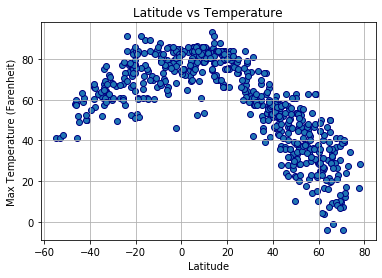

In [9]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Max Temperature'], marker = 'o', linewidths = 1, edgecolors='navy')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title("Latitude vs Temperature")
plt.grid()
plt.savefig("output_data/latitude_temperature.png")

## Latitude vs. Humidity Plot

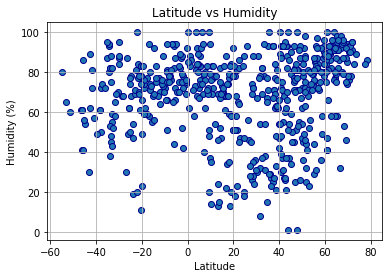

In [10]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Humidity'], marker = 'o', linewidths = 1, edgecolors='darkblue')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity")
plt.grid()
plt.savefig('output_data/latitude_humidity.png')

## Latitude vs. Cloudiness Plot

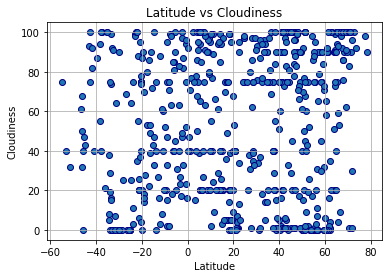

In [11]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Cloudiness'], marker = 'o', linewidths = 1, edgecolors='navy')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.grid()
plt.savefig("output_data/latitude_cloudiness.png")

## Latitude vs. Wind Speed Plot

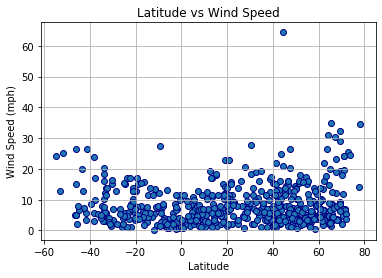

In [12]:
plt.scatter(clean_city_data['Latitude'], clean_city_data['Wind Speed'], marker = 'o', linewidths = 1, edgecolors='navy')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed")
plt.grid()
plt.savefig("output_data/latitude_wind.png")

## Linear Regression

In [23]:
# OPTIONAL: Create a function to create Linear Regression plots
# funtion will present all the results only by passing the x and y values
def regression_results(x_values, y_values, hemisphere):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker = 'o', linewidths = 1, edgecolors='rebeccapurple')
    plt.xlabel(x_values.name)
    plt.ylabel(y_values.name)
    plt.title(f"{x_values.name} vs {y_values.name}")
    print(f"The r-squared is: {rvalue**2}")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")
    plt.savefig(f"output_data/{x_values.name}_{y_values.name}_{hemisphere}.png")


In [24]:
# Create Northern and Southern Hemisphere DataFrames
# Using the condition that north hemisphere has Latitude > 0, the dataframe is divided
northern = clean_city_data[clean_city_data['Latitude']>=0]
southern = clean_city_data[clean_city_data['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7649258534590203


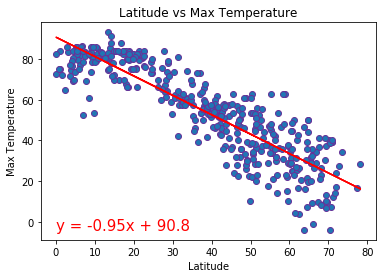

In [25]:
regression_results(northern['Latitude'], northern['Max Temperature'], 'northern')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4213059694346043


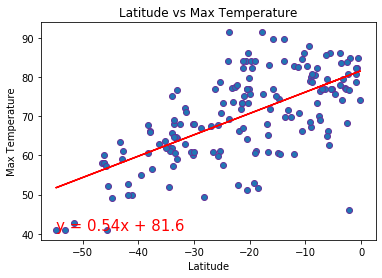

In [26]:
regression_results(southern['Latitude'], southern['Max Temperature'], "southern")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0408828847741572


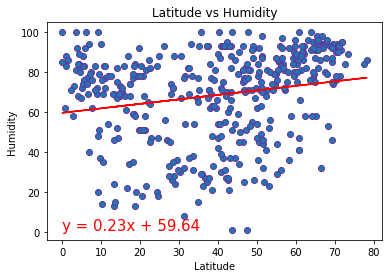

In [27]:
regression_results(northern['Latitude'], northern['Humidity'], 'northern')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0626627435576369


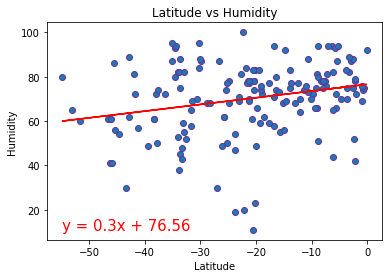

In [28]:
regression_results(southern['Latitude'], southern['Humidity'], 'southern')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.005409461427615961


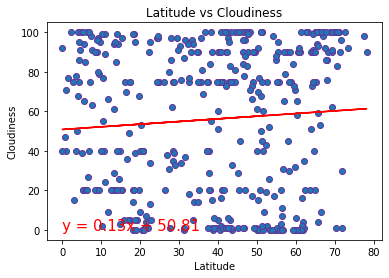

In [29]:
regression_results(northern['Latitude'], northern['Cloudiness'], 'northern')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0042424348367097


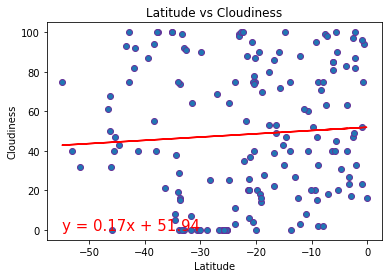

In [31]:
regression_results(southern['Latitude'], southern['Cloudiness'],'southern')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.040714972114727604


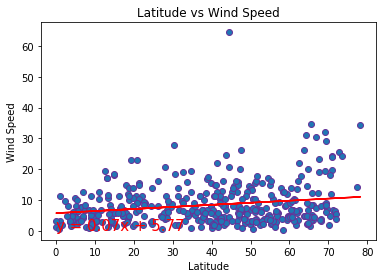

In [32]:
regression_results(northern['Latitude'], northern['Wind Speed'], 'northern')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1345687736928462


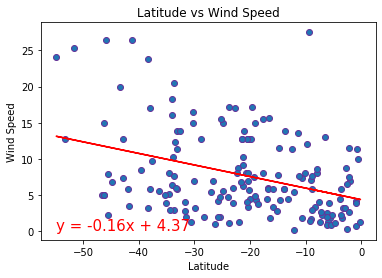

In [33]:
regression_results(southern['Latitude'], southern['Wind Speed'], 'southern')